In [81]:
import os, sys, PIL
import numpy as np
np.random.seed(1234)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10, 7

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('data/housing.data', sep='\s+', header = None)
df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','PRICE']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


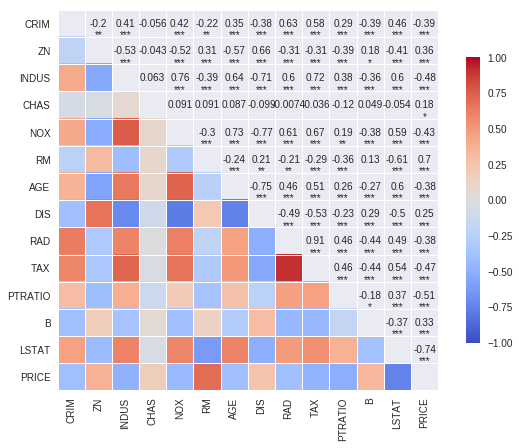

In [16]:
sns.corrplot(df, diag_names=False)

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


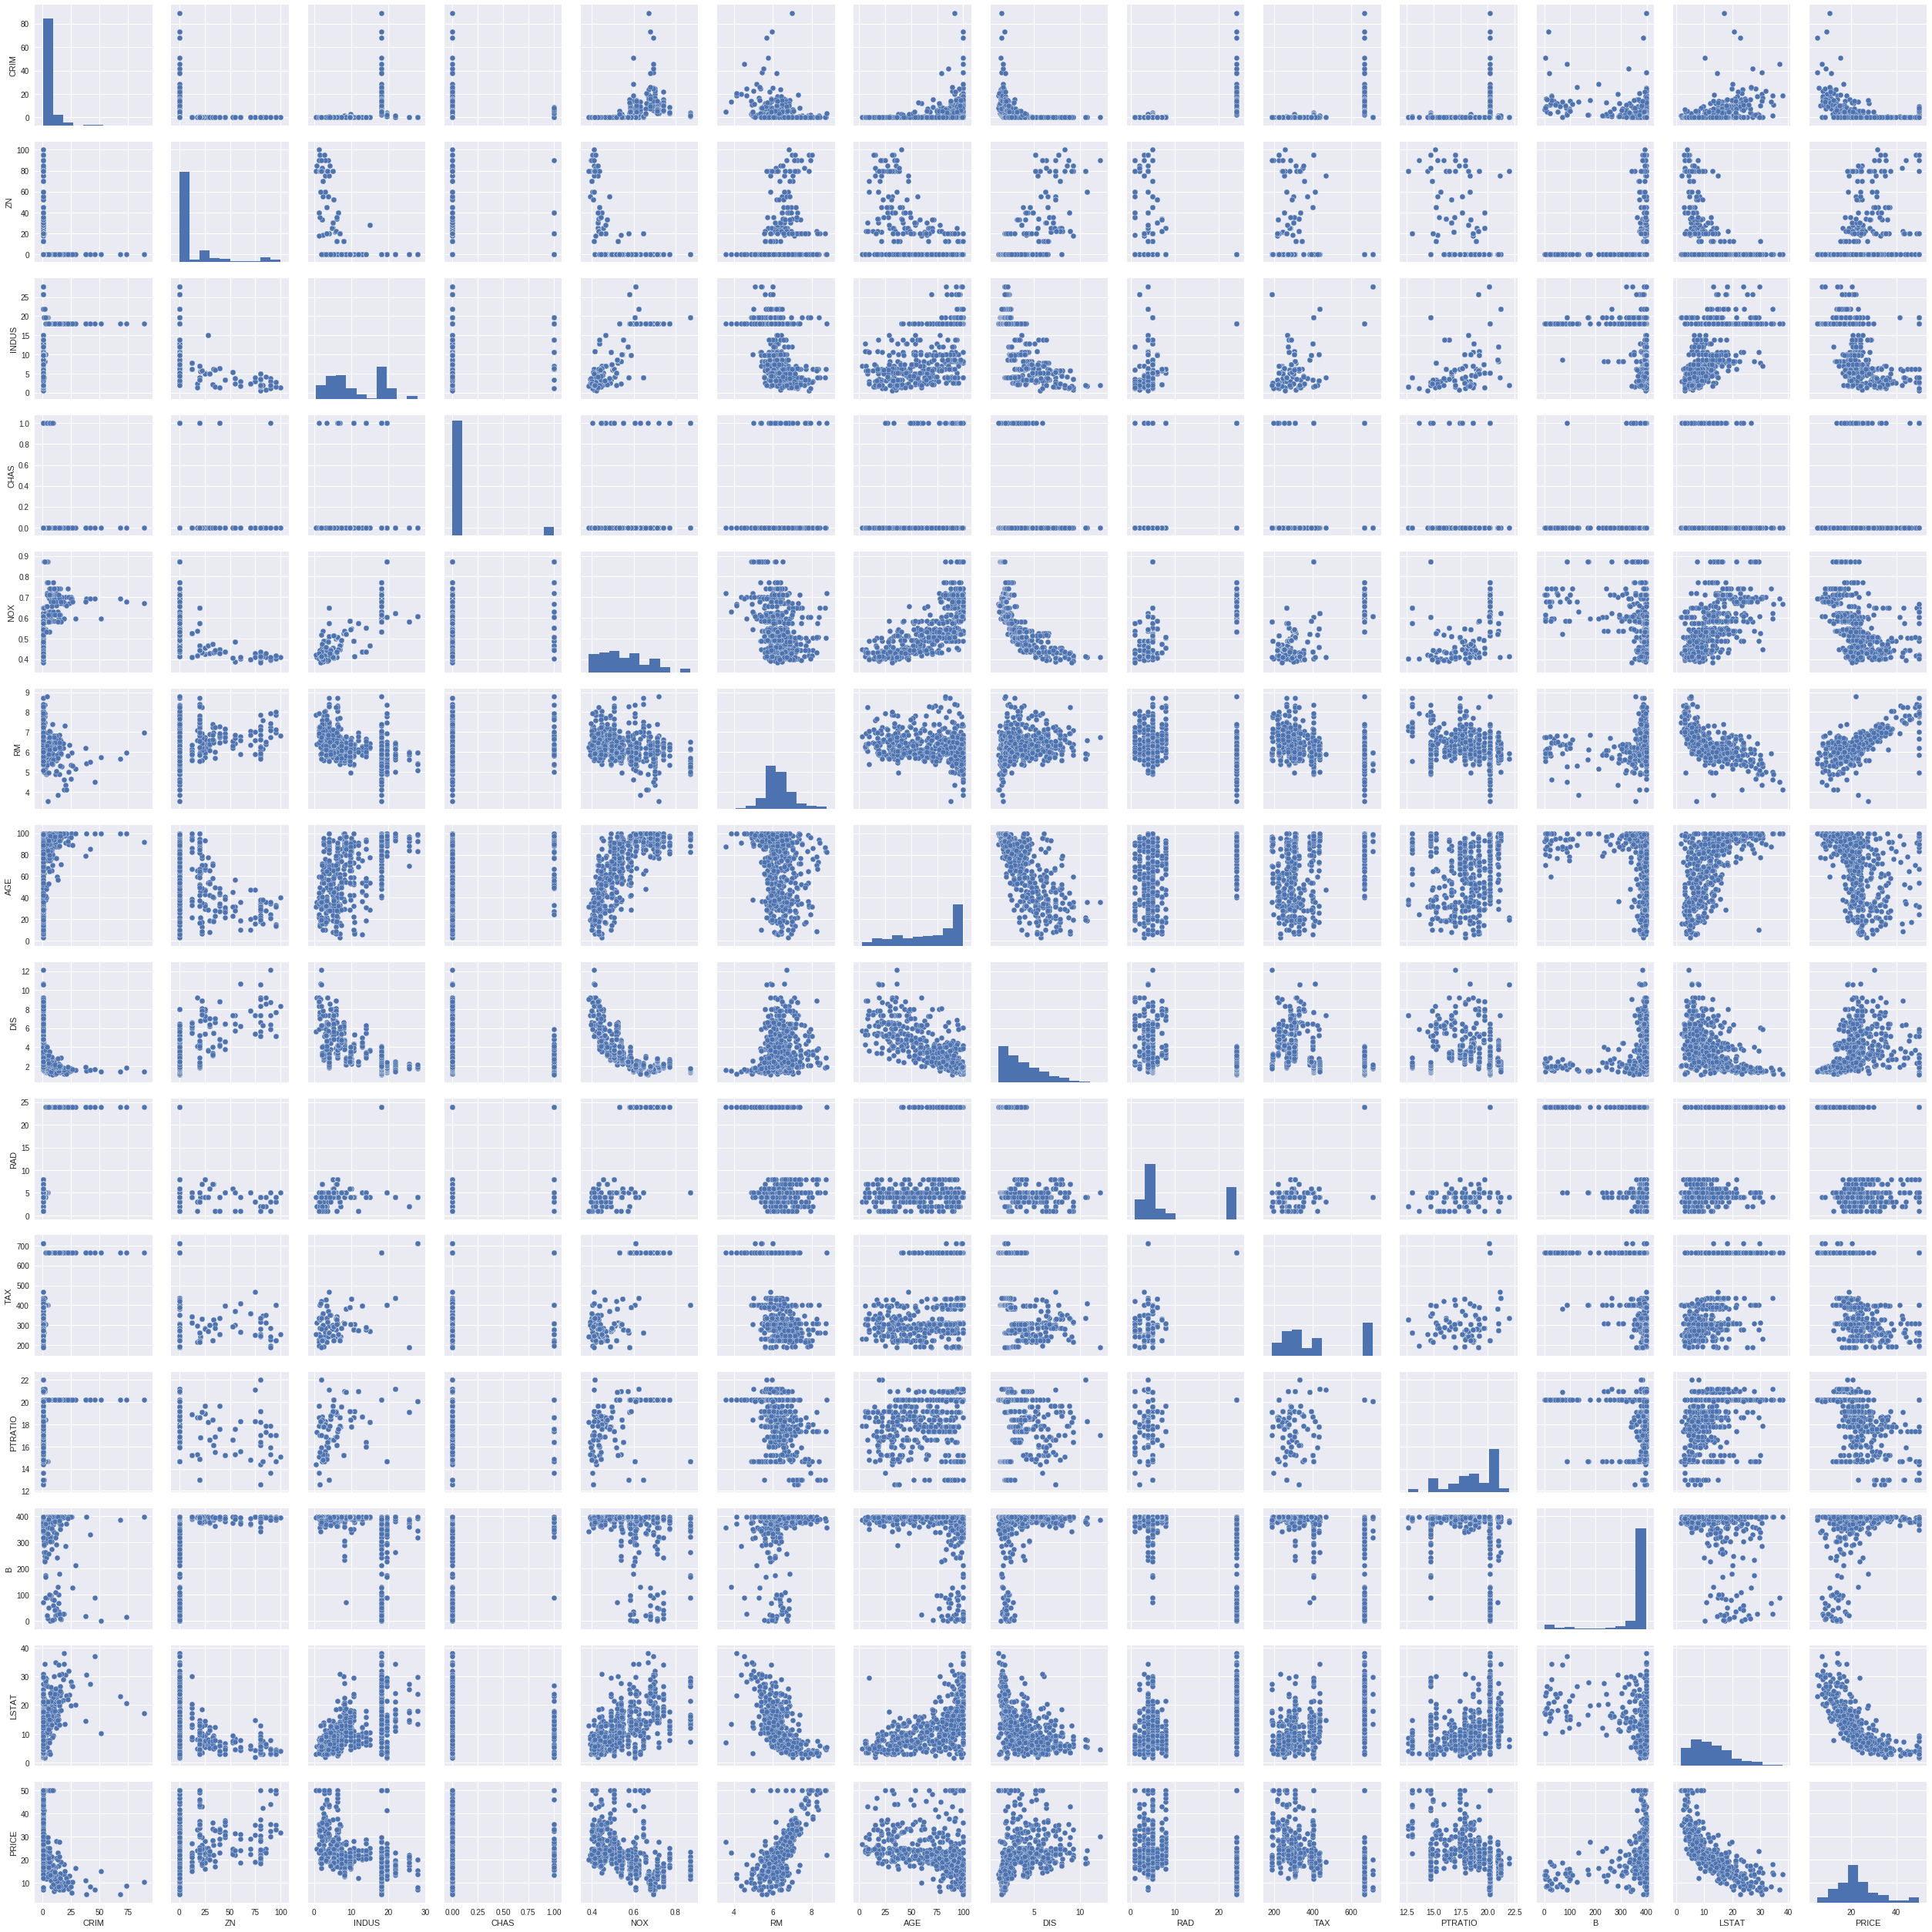

In [24]:
sns.pairplot(df)

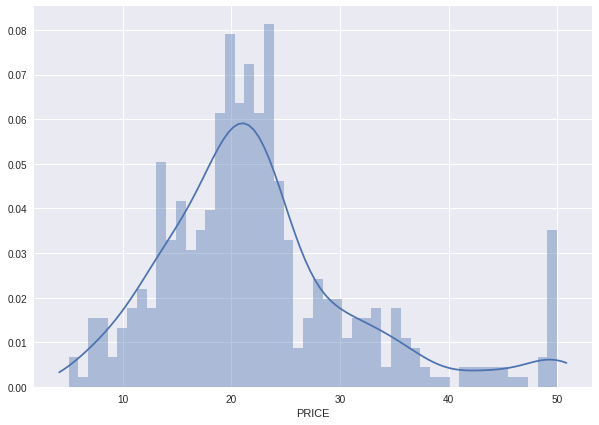

In [36]:
sns.distplot(df['PRICE'], bins=50)

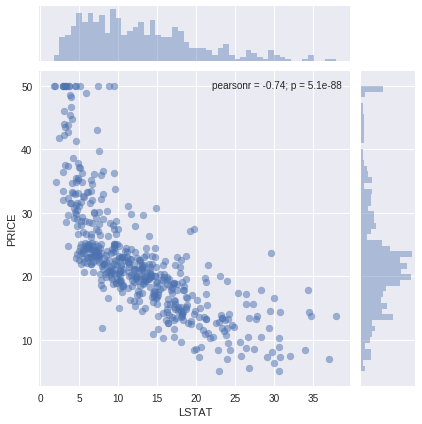

In [46]:
sns.jointplot(df['LSTAT'], df['PRICE'], kind='scatter', marginal_kws={'bins':50}, joint_kws={'alpha':0.5})

In [95]:
prices = df['PRICE']
X = df.drop('PRICE', axis=1)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, prices, test_size=0.2)
train, test = train_test_split(df, test_size=0.2)

In [96]:
print Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape 

(404, 13) (102, 13) (404,) (102,)


In [97]:
lm = LinearRegression()
lm.fit(Xtrain, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [98]:
pred_train = lm.predict(Xtrain)
pred_test = lm.predict(Xtest)

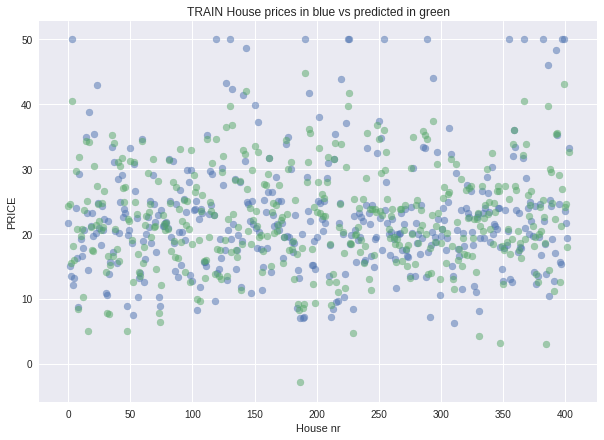

In [99]:
plt.scatter(range(len(Ytrain)), Ytrain, alpha=0.5)
plt.scatter(range(len(pred_train)), pred_train, alpha=0.5)
plt.xlabel('House nr')
plt.ylabel('PRICE')
plt.title('TRAIN House prices in blue vs predicted in green')

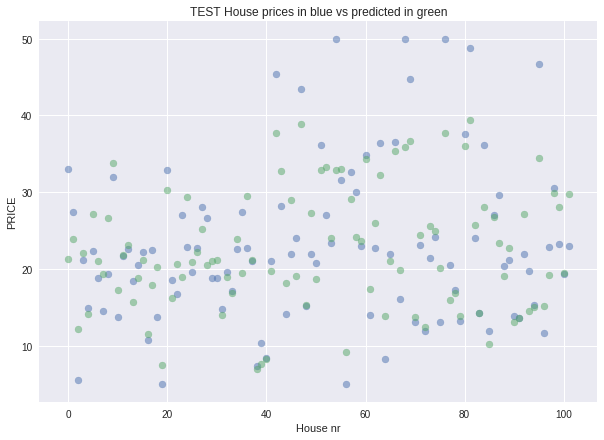

In [100]:
plt.scatter(range(len(Ytest)), Ytest, alpha=0.5)
plt.scatter(range(len(pred_test)), pred_test, alpha=0.5)
plt.xlabel('House nr')
plt.ylabel('PRICE')
plt.title('TEST House prices in blue vs predicted in green')

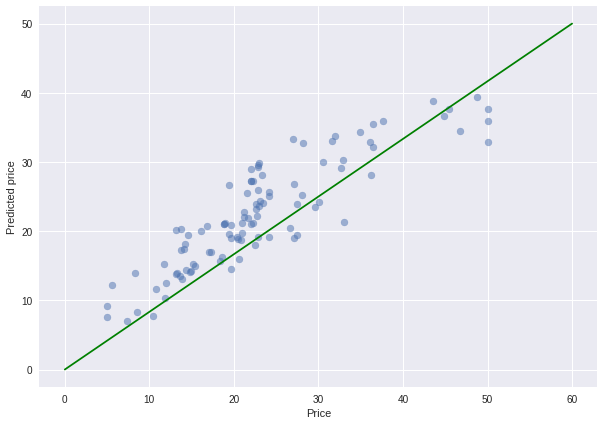

In [104]:
plt.scatter(Ytest, pred_test, alpha=0.5)
plt.plot([0,60], [0,50], c='g')
plt.xlabel('Price')
plt.ylabel('Predicted price')